C:\Users\0josh\AppData\Local\Temp\ipykernel_15812\4117542242.py:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


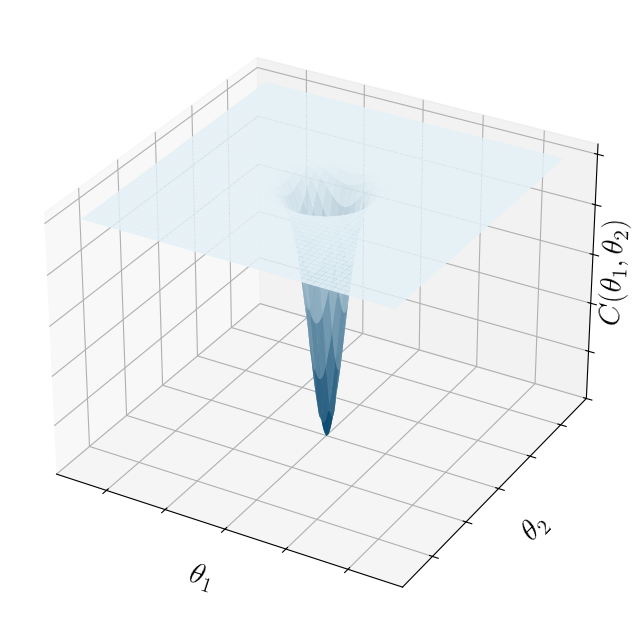

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Configure Matplotlib to use LaTeX fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 22
})

# Create a grid of points
theta1 = np.linspace(-5, 5, 400)
theta2 = np.linspace(-5, 5, 400)
Theta1, Theta2 = np.meshgrid(theta1, theta2)

# Define the cost function
# Symmetric narrow gorge at the center using a Gaussian dip
gorge_depth = 5        # Depth of the gorge
gorge_width = 0.5      # Width of the gorge

# Flat plateau with a symmetric narrow gorge
C_theta = 1 - gorge_depth * np.exp(- (Theta1**2 + Theta2**2) / (2 * gorge_width**2))

# Define a custom colormap: "#FEB24C" for the gorge and black for the plateau
#colors = ["#B10026", "#FFF3B2"]
#colors = ["#6E005F", "#FCE1A4"]
#colors = ["#FFF3B2", "#B10026"]
#colors = ["#8F003B", "#F9D8E6"]
colors = ["#0D4A70","#E4F1F7"]
custom_cmap = LinearSegmentedColormap.from_list("gorge_cmap", colors, N=256)

# Initialize the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)


# Plot the surface with the custom colormap
surf = ax.plot_surface(Theta1, Theta2, C_theta, cmap=custom_cmap, edgecolor='none', alpha=0.9)

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Customize the z-axis
ax.set_zlim(-gorge_depth + 1, 1.2)
ax.set_zlabel(r'$C(\theta_1, \theta_2)$', fontsize=22,labelpad=-11)

# Set axis labels using LaTeX notation
ax.set_xlabel(r'$\theta_1$', fontsize=22)
ax.set_ylabel(r'$\theta_2$', fontsize=22)

#ax.zaxis.labelpad=-1

# Remove axis tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Remove the title
# ax.set_title('')  # Title has been removed

# Remove the legend (none was added, but ensuring it's not present)
# No legend commands are present

# Add a color bar without axis tick labels
#color_bar = fig.colorbar(surf, shrink=0.5, aspect=10)
#color_bar.ax.set_ylabel(r'$C(\theta_1, \theta_2)$', fontsize=14)
#color_bar.ax.set_yticklabels([])  # Remove color bar tick labels

# Enhance aesthetics
plt.tight_layout()

plt.savefig(r'C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Misc. Plots\3d_bp.png', dpi=300, bbox_inches='tight',transparent=True)

# Show the plot
plt.show()


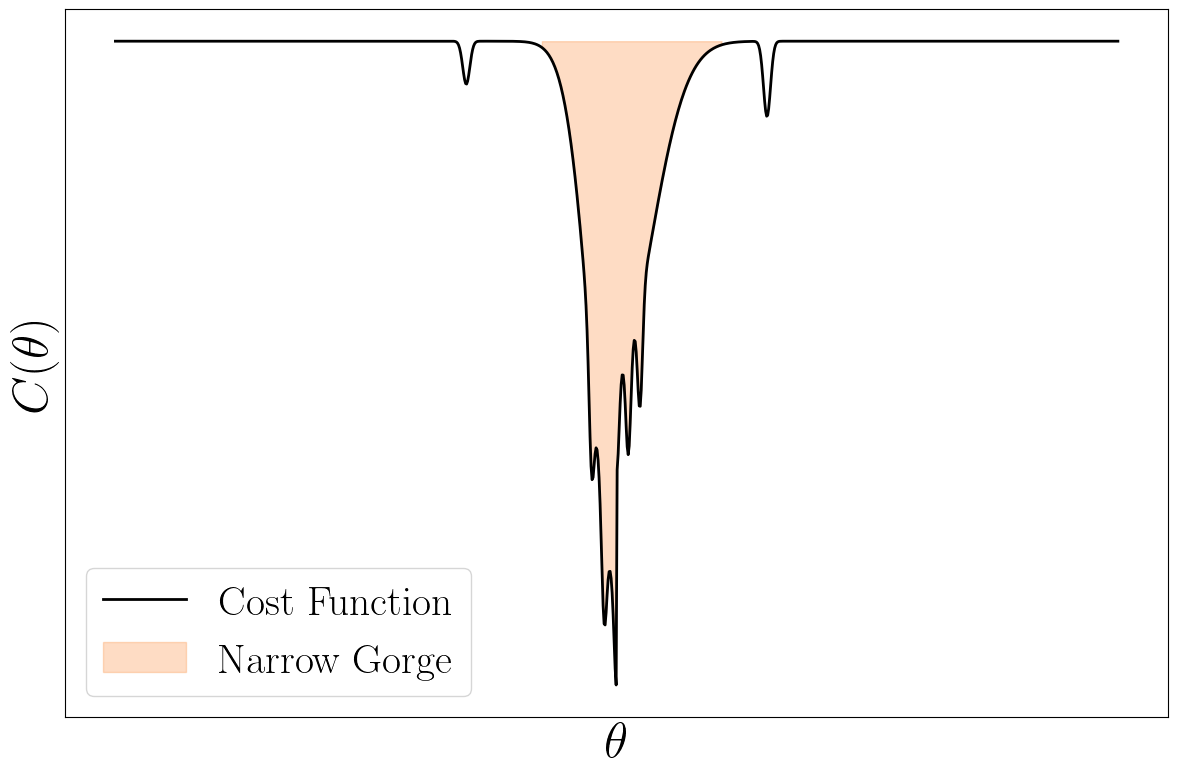

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX fonts
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 14
})

# Define the parameter space
x = np.linspace(-10, 10, 1000)

# Define the cost function parameters
# Asymmetric gorge parameters
gorge_depth_left = 5           # Depth of the gorge on the left side
gorge_depth_right = 3          # Depth of the gorge on the right side (asymmetry)
gorge_width_left = 0.5         # Width of the gorge on the left side
gorge_width_right = 0.7        # Width of the gorge on the right side (asymmetry)

# Local minima within the gorge
num_minima = 5                 # Number of local minima within the gorge
minima_depth = 1               # Depth of each local minimum within the gorge
minima_width = 0.05            # Width of the local minima within the gorge

# Additional local minima outside the gorge
# Right-side external minima
external_minima_right_depth = 0.7    # Depth of the external minima on the right
external_minima_right_width = 0.07    # Width of the external minima on the right
external_minima_right_position = 3.0   # Position of the external minima on the right

# Left-side external minima
external_minima_left_depth = 0.4      # Depth of the external minima on the left (shallow)
external_minima_left_width = 0.07      # Width of the external minima on the left
external_minima_left_position = -3.0   # Position of the external minima on the left

# Initialize the cost function with a flat plateau
Z = np.ones_like(x)  # Z = 1 across all x

# Introduce the asymmetric narrow gorge using Gaussian dips
# Left side gorge
Z -= gorge_depth_left * np.exp(- (x**2) / (2 * gorge_width_left**2)) * (x < 0)
# Right side gorge
Z -= gorge_depth_right * np.exp(- (x**2) / (2 * gorge_width_right**2)) * (x >= 0)

# Add multiple distinct local minima within the gorge
# Positions are equally spaced within the gorge, adjusted for asymmetry
minima_positions_left = np.linspace(-gorge_width_left, 0, num_minima // 2, endpoint=False)
minima_positions_right = np.linspace(0, gorge_width_right, num_minima - num_minima // 2, endpoint=False)
minima_positions = np.concatenate((minima_positions_left, minima_positions_right))

for pos in minima_positions:
    Z -= minima_depth * np.exp(- ((x - pos)**2) / (2 * minima_width**2))

# Add a single local minimum outside of the gorge on the right
Z -= external_minima_right_depth * np.exp(- ((x - external_minima_right_position)**2) / (2 * external_minima_right_width**2))

# Add a shallow local minimum outside of the gorge on the left
Z -= external_minima_left_depth * np.exp(- ((x - external_minima_left_position)**2) / (2 * external_minima_left_width**2))

# Initialize the plot
plt.figure(figsize=(12,8))

# Plot the cost function curve
plt.plot(x, Z, color='black', linewidth=2, label='Cost Function')

# Highlight the gorge regions
# Determine the gorge regions based on asymmetry
gorge_region_left = (x < 0) & (np.abs(x) < 3 * gorge_width_left)
gorge_region_right = (x >= 0) & (np.abs(x) < 3 * gorge_width_right)
gorge_region = gorge_region_left | gorge_region_right

#plt.fill_between(x, Z, 1, where=gorge_region, color='#FEB24C', alpha=0.3, label='Narrow Gorge')
#plt.fill_between(x, Z, 1, where=gorge_region, color='#B10026', alpha=0.3, label='Narrow Gorge')
plt.fill_between(x, Z, 1, where=gorge_region, color='#FD8D3C', alpha=0.3, label='Narrow Gorge')

# Remove axis tick labels
plt.xticks([])
plt.yticks([])

# Set axis labels using LaTeX notation
plt.xlabel(r'$\theta$',fontsize=36)
plt.ylabel(r'$C(\theta)$',fontsize=36)

# Remove the title
# plt.title('...')  # Title has been removed

# Remove grid lines
# Grid lines have been removed by not calling plt.grid()

# Add legend
plt.legend(fontsize=30)

# Enhance aesthetics
plt.tight_layout()

plt.savefig(r'C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\Misc. Plots\2d_bp.png', dpi=600, bbox_inches='tight',transparent=True)

# Show the plot
plt.show() 